In [1]:
import pandas as pd
import numpy as np

# Visualizacion del arbol
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Regresion Logistica
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Evaluacion del Modelo
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_excel('https://github.com/majash29/CienciaDatosSENAV02/raw/main/05-ModeloArboles/08_TallerArbolesClasificacion/Dataset/agricultura.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   N              2200 non-null   int64 
 1   P              2200 non-null   int64 
 2   K              2200 non-null   int64 
 3   temperatura    2200 non-null   int64 
 4   humedad        2200 non-null   int64 
 5   ph             2200 non-null   int64 
 6   precipitacion  2200 non-null   int64 
 7   etiqueta       2200 non-null   object
dtypes: int64(7), object(1)
memory usage: 137.6+ KB


In [4]:
df

,N,P,K,temperatura,humedad,ph,precipitacion,etiqueta
0,90,42,43,2087974371,8200274423,6502985292000000,2029355362,arroz
1,85,58,41,2177046169,8031964408,7038096361,2266555374,arroz
2,60,55,44,2300445915,823207629,7840207144,2639642476,arroz
3,74,35,40,2649109635,8015836264,6980400905,2428640342,arroz
4,78,42,42,2013017482,8160487287,7628472891,2627173405,arroz
...,...,...,...,...,...,...,...,...
2195,107,34,32,2677463708,664132686,678006386,1777745075,cafe
2196,99,15,27,2741711238,5663636248,6086922359,12792461000000000,cafe
2197,118,33,30,2413179691,6722512329,6362607851,17332283859999900,cafe
2198,117,32,34,262724184,5212739421,6758792552,1271752928,cafe


In [5]:
df.columns = ['Nitrogeno', 'Fosforo', 'Potasio', 'Temperatura', 'Humedad', 'Ph', 'Precipitacion', 'Etiqueta']

In [6]:
df

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,Ph,Precipitacion,Etiqueta
0,90,42,43,2087974371,8200274423,6502985292000000,2029355362,arroz
1,85,58,41,2177046169,8031964408,7038096361,2266555374,arroz
2,60,55,44,2300445915,823207629,7840207144,2639642476,arroz
3,74,35,40,2649109635,8015836264,6980400905,2428640342,arroz
4,78,42,42,2013017482,8160487287,7628472891,2627173405,arroz
...,...,...,...,...,...,...,...,...
2195,107,34,32,2677463708,664132686,678006386,1777745075,cafe
2196,99,15,27,2741711238,5663636248,6086922359,12792461000000000,cafe
2197,118,33,30,2413179691,6722512329,6362607851,17332283859999900,cafe
2198,117,32,34,262724184,5212739421,6758792552,1271752928,cafe


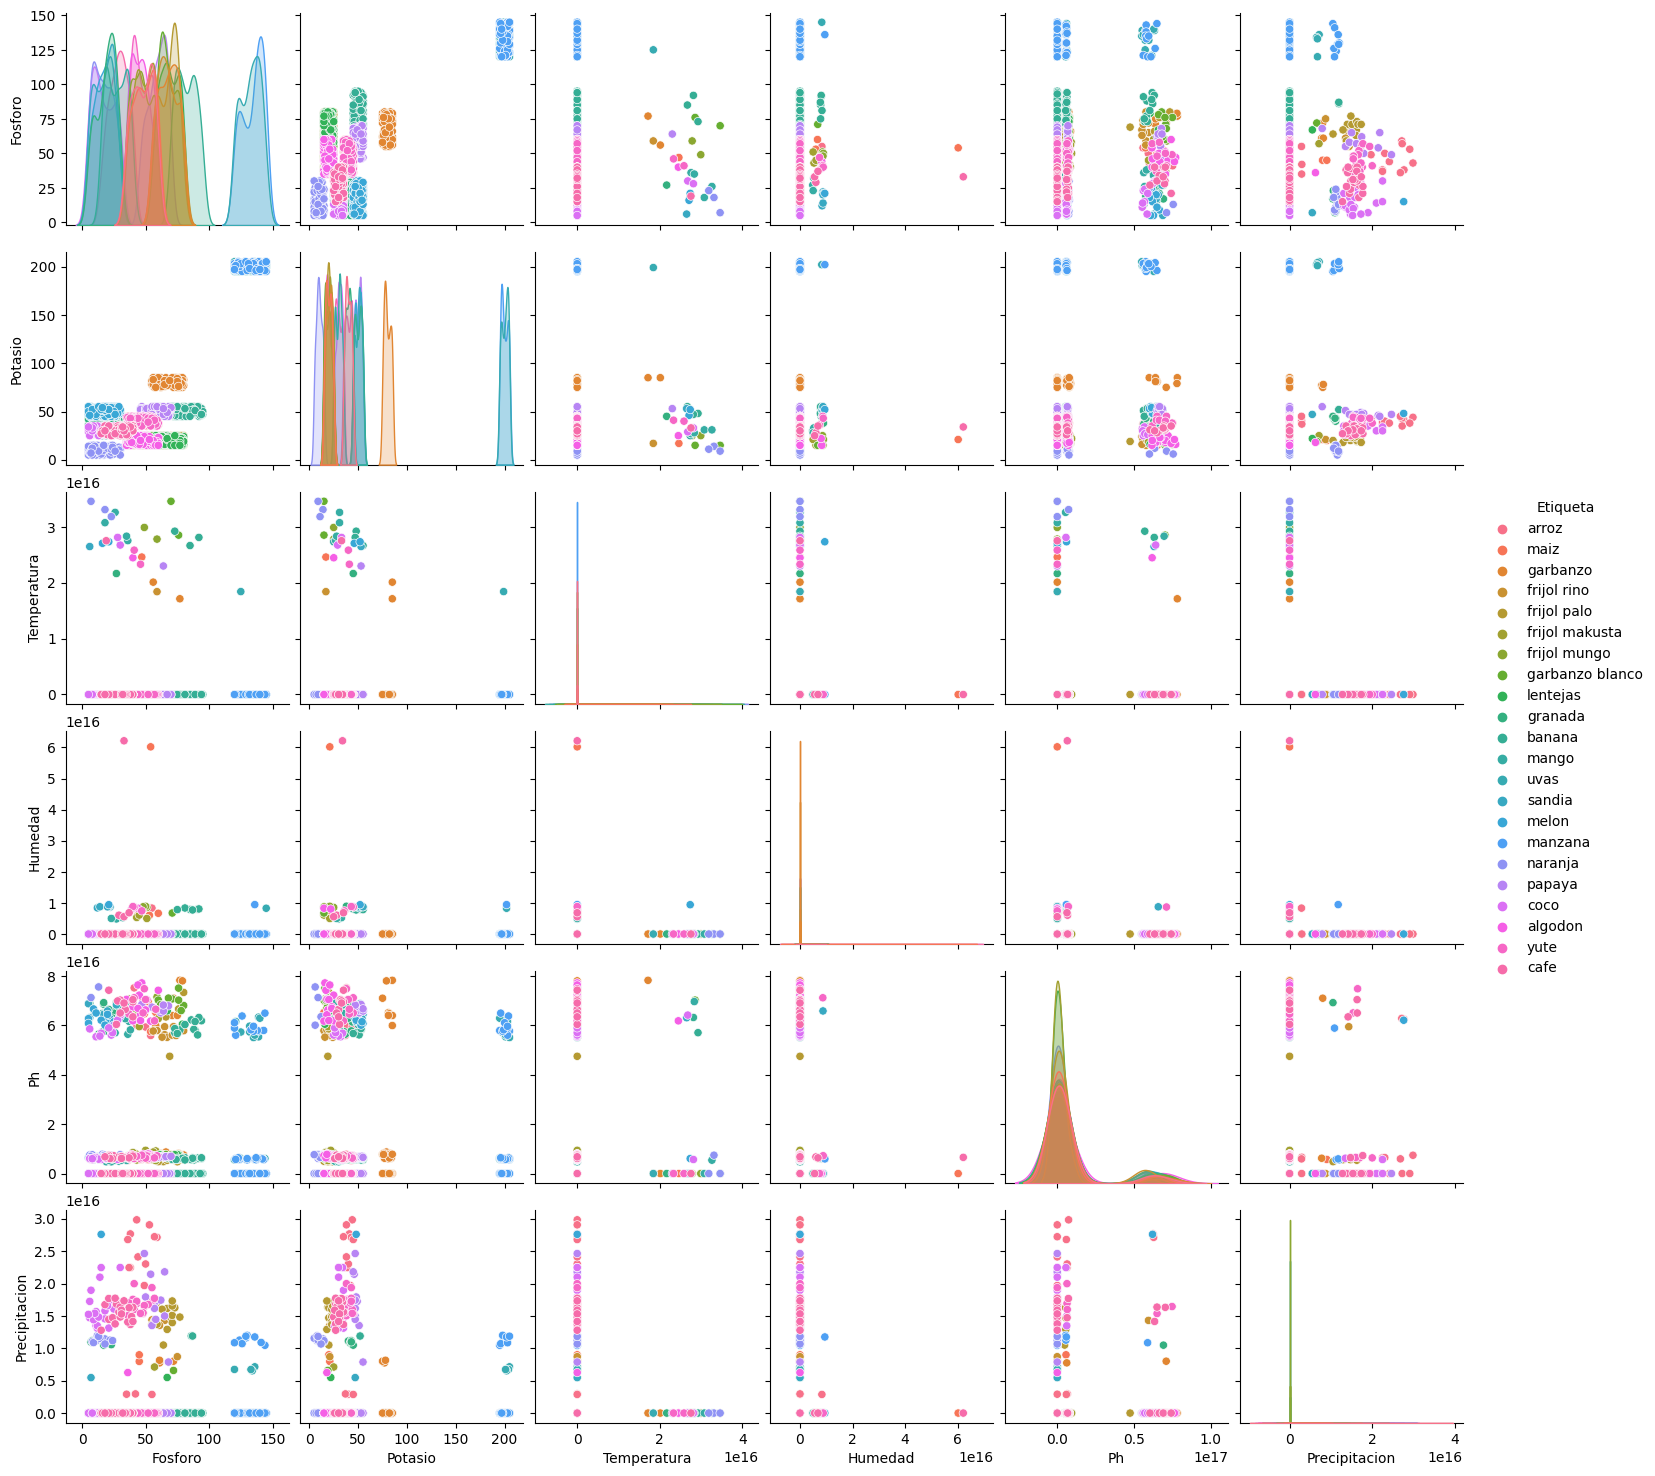

In [7]:
sns.pairplot(df.iloc[:,1:],hue='Etiqueta')

In [8]:
df = shuffle(df, random_state=1)

In [9]:
df

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,Ph,Precipitacion,Etiqueta
1276,25,129,195,1798667801,8117712085,5777271492000000,7237127689,uvas
1446,106,20,51,2973019662,9097015715,6342573112,2049035619,melon
335,33,59,22,2264236876,2159396123,5946999529,1223886015,frijol rino
1458,89,9,47,2947156259,9077069618,66683827660000000,2875226067,melon
2038,62,49,37,2421744605,8285284045,7479248124,16613658859999900,yute
...,...,...,...,...,...,...,...,...
960,1,27,36,2398598756,9334236582,5684995235,104991282,granada
905,31,25,38,2496273236,9240501423,64973666770000000,1094169192,granada
1096,92,81,52,280106804,7652808057,5891413895,1037040783,banana
235,28,58,81,1747500984,1654314829,618042747,9335034262,garbanzo


In [10]:
variables = ['Nitrogeno', 'Fosforo', 'Potasio', 'Temperatura', 'Humedad', 'Ph', 'Precipitacion']

X = df[variables]
y = df['Etiqueta']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [12]:
model = DecisionTreeClassifier(random_state=10)

In [13]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [14]:
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo: %.2f' % accuracy)

Precisión del modelo: 0.96


In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusión: ')
conf_matrix

Matriz de confusión: 


array([[19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 17,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1],
       [ 0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  0,  2,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 23,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 24,  0,  0,

In [17]:
Nitrogeno = 13
Fosforo = 5
Potasio = 8
Temperatura = 2385340379
Humedad = 9010522549
Ph = 7474710503
Precipitacion = 10392226

In [22]:
new_samples = np.array([[Nitrogeno, Fosforo, Potasio, Temperatura, Humedad, Ph, Precipitacion]])

y_pred_new = model.predict(new_samples)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
print(f"La Clasificacion de agricultura es: {y_pred_new[0]}")

La Clasificacion de agricultura es: naranja


In [24]:
import pickle

with open('modelo_taller_arbol.pkl', 'wb') as file:
    pickle.dump(model, file)